In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('/Users/meruozhu/Downloads/MP_data/MP_codes/MP')
from DPM.task_free_continual_learning.method import Task_free_continual_learning
from DPM.task_free_continual_learning.sampler import Sampler
from DPM.task_free_continual_learning.main_provide_data_model import main
from DPM.task_free_continual_learning.main_provide_data_model import experiment
from edbn.Methods.SDL.sdl import transform_data

In [4]:
import time
import pandas as pd
import numpy as np
from Data.data import Data
from edbn.Utils.LogFile import LogFile
import edbn.Predictions.setting as setting
from edbn import Methods
from collections import deque
from itertools import islice
from collections import OrderedDict
from PrefixTreeCDD.PrefixTreeClass import PrefixTree
import PrefixTreeCDD.settings as settings
from PrefixTreeCDD.CDD import Window
from skmultiflow.drift_detection import ADWIN, PageHinkley
import math
from numpy import log as ln
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import utils as ku
import numpy.random as rn

In [25]:
file = '/Users/meruozhu/Downloads/MP_data/MP_codes/MP/Data/test_dataset/PermitLog_mini.csv'
data = pd.read_csv(file, low_memory=False)
timeformat = "%Y-%m-%d %H:%M:%S"
numEvents = data.shape[0]
print("Num events is {}".format(numEvents))

dataName = 'Helpdesk_mini'
log = LogFile(filename=file, delim=",", header=0, rows=None, time_attr="completeTime", trace_attr="case",
                    activity_attr='event', convert=False)
d = Data(dataName,
            LogFile(filename=file, delim=",", header=0, rows=None, time_attr="completeTime", trace_attr="case",
                    activity_attr='event', convert=False))
d.logfile.keep_attributes(['event', 'role', 'completeTime'])
m = Methods.get_prediction_method("SDL")
s = setting.STANDARD
trainPerc = 0.8
s.train_percentage = trainPerc * 100
# # #
d.prepare(s)
# d.create_batch("normal", timeformat)
is_written = 0

start_time = time.time()
# print(d.train.contextdata)
print("Test Context Data")
print(d.test_orig.contextdata)
basic_model = m.train(d.train,{"epochs": 0, "early_stop": 10})

Num events is 300
PREPARE
CONVERT
PREPROCESSING: Converting event
PREPROCESSING: Converting role
PREPROCESSING: Converting case
K-CONTEXT
Create k-context: 10


KeyboardInterrupt: 

In [35]:
file = '/Users/meruozhu/Downloads/MP_data/MP_codes/MP/Data/test_dataset/PermitLog_medium.csv'

Num events is 1000
PREPARE
CONVERT
PREPROCESSING: Converting event
PREPROCESSING: Converting role
PREPROCESSING: Converting case
K-CONTEXT
Create k-context: 10
SPLIT TRAIN-TEST
Train: 800
Test: 200
data prepared done
Test Context Data
Model: "model_34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
event_Prev0 (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
event_Prev1 (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
event_Prev2 (InputLayer)        [(None, 1)]          0                                            
______________________________________________________

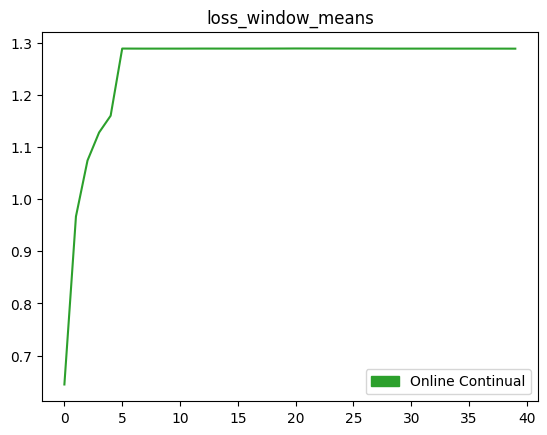

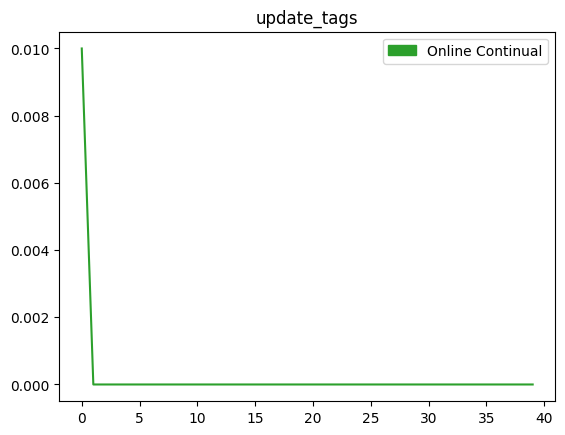

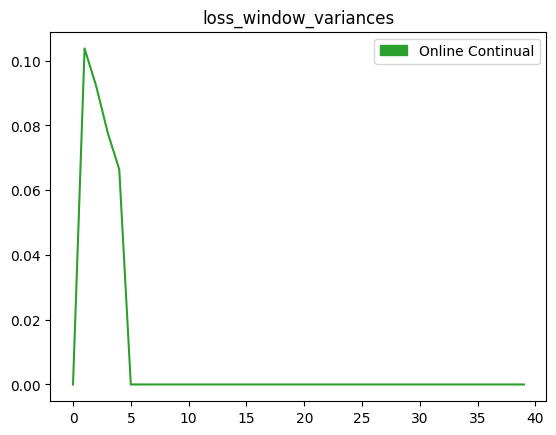

{'Online Continual': [0.64444435, 0.9666049, 1.0739363, 1.1275697, 1.1597606, 1.2885458, 1.28847, 1.2884287, 1.2884411, 1.2884347, 1.2884235, 1.2884719, 1.2885163, 1.288501, 1.288505, 1.288469, 1.2884982, 1.2885002, 1.2885567, 1.2885984, 1.2886988, 1.2886622, 1.2886589, 1.288632, 1.2885932, 1.2885513, 1.2885315, 1.2884884, 1.288439, 1.28844, 1.2884384, 1.28843, 1.2884481, 1.288441, 1.2884264, 1.2884352, 1.2884272, 1.2884041, 1.2884034, 1.28836]}
Running time: 30.182497024536133 seconds
Experiment record saved to ./results/PermitLog_medium_rbs20_hbs20.json


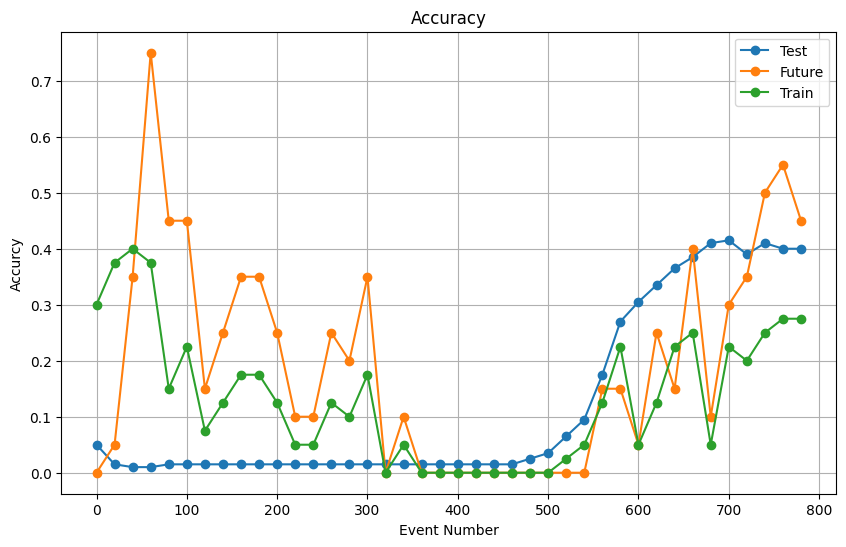

([0.3,
  0.375,
  0.4,
  0.375,
  0.15,
  0.225,
  0.075,
  0.125,
  0.175,
  0.175,
  0.125,
  0.05,
  0.05,
  0.125,
  0.1,
  0.175,
  0.0,
  0.05,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.025,
  0.05,
  0.125,
  0.225,
  0.05,
  0.125,
  0.225,
  0.25,
  0.05,
  0.225,
  0.2,
  0.25,
  0.275,
  0.275],
 {'Online Continual': {0: [0.05,
    0.015,
    0.01,
    0.01,
    0.015,
    0.015,
    0.015,
    0.015,
    0.015,
    0.015,
    0.015,
    0.015,
    0.015,
    0.015,
    0.015,
    0.015,
    0.015,
    0.015,
    0.015,
    0.015,
    0.015,
    0.015,
    0.015,
    0.015,
    0.025,
    0.035,
    0.065,
    0.095,
    0.175,
    0.27,
    0.305,
    0.335,
    0.365,
    0.385,
    0.41,
    0.415,
    0.39,
    0.41,
    0.4,
    0.4]}},
 [0.0,
  0.05,
  0.35,
  0.75,
  0.45,
  0.45,
  0.15,
  0.25,
  0.35,
  0.35,
  0.25,
  0.1,
  0.1,
  0.25,
  0.2,
  0.35,
  0.0,
  0.1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.15,
  0

In [41]:
main(file, 20,20)